In [69]:
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2
import joblib
from glob import glob
from PIL import Image

In [70]:
# (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [71]:
# Define the paths to your training and testing datasets
train_data_dir = './dataset/train2/'
test_data_dir = './dataset/valid2/'

C:\Users\soyvi\AppData\Local\Temp\ipykernel_3672\3499507226.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


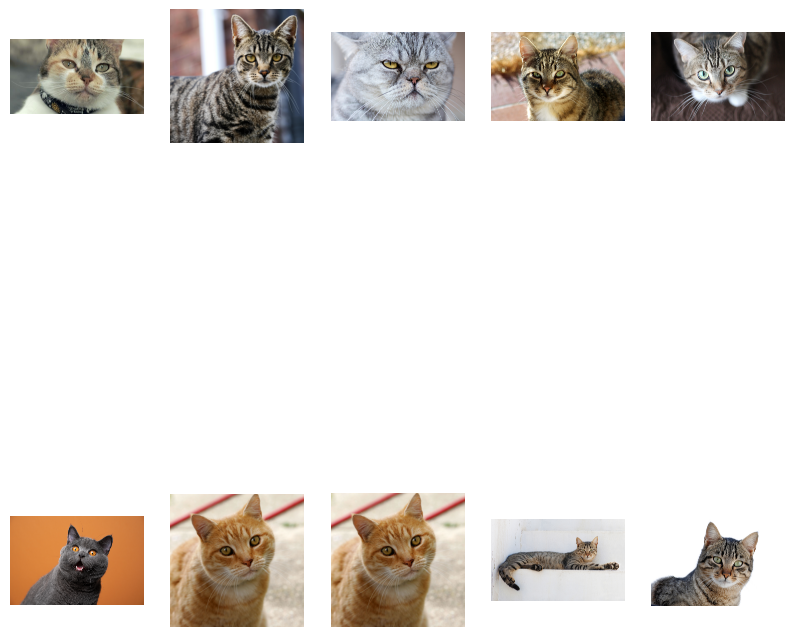

In [72]:
import os

# Get the list of image file paths from the train_data_dir directory
image_paths = glob(os.path.join(train_data_dir, '*', '*.jpg'))

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 12), gridspec_kw={'hspace': 0.1})

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the first 10 images
for i, image_path in enumerate(image_paths[:10]):
    # Load the image using PIL
    image = Image.open(image_path)
    # Resize the image to (32, 32) for visualization
    # image = image.resize((32, 32))
    # Convert the image to numpy array
    image = np.array(image)

    # Plot the image
    axes[i].imshow(image)
    axes[i].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [73]:


# Set the desired image size and batch size
image_size = (32, 32)
batch_size = 300

# Create an instance of ImageDataGenerator for training data
train_datagen = ImageDataGenerator(rescale=1./255)

# Load the training data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical')

# Create an instance of ImageDataGenerator for testing data
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the testing data
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical')

# Assign the loaded data to variables
x_train, y_train = train_generator.next()
x_test, y_test = test_generator.next()

Found 749 images belonging to 2 classes.
Found 342 images belonging to 2 classes.


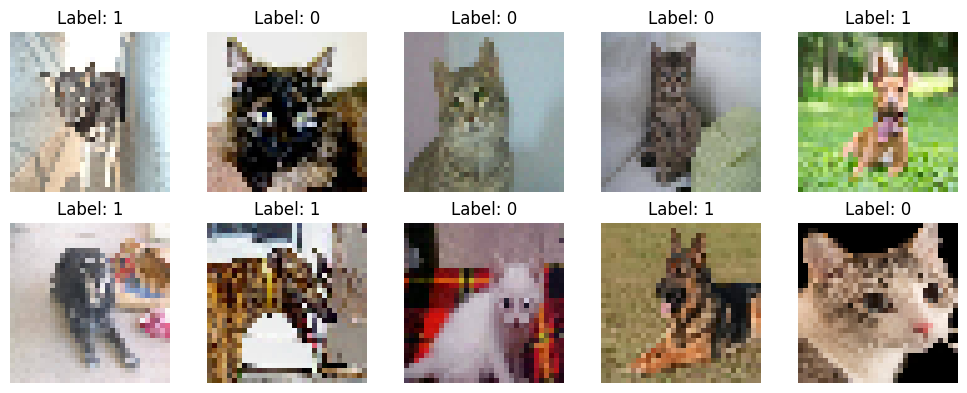

In [74]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the first 10 images
for i in range(10):
    # Get the image and corresponding label
    image = x_train[i]
    label = np.argmax(y_train[i])

    # Reshape the image to (32, 32, 3)
    image = image.reshape((32, 32, 3))

    # Plot the image
    axes[i].imshow(image)
    axes[i].set_title(f'Label: {label}')
    axes[i].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [75]:
x_train.shape,x_test.shape

((300, 32, 32, 3), (300, 32, 32, 3))

In [76]:
#Normalization
x_train = x_train/255.0
x_test = x_test/255.0

In [77]:
x_train

array([[[[2.56824307e-03, 2.73740874e-03, 2.79892352e-03],
         [2.46059219e-03, 2.62975786e-03, 2.72203004e-03],
         [2.36832001e-03, 2.56824307e-03, 2.66051525e-03],
         ...,
         [3.27566359e-03, 3.58323753e-03, 3.72164580e-03],
         [3.33717838e-03, 3.61399492e-03, 3.76778189e-03],
         [3.38331447e-03, 3.69088841e-03, 3.82929668e-03]],

        [[2.64513656e-03, 2.84505961e-03, 2.96808942e-03],
         [2.58362177e-03, 2.78354483e-03, 2.90657440e-03],
         [2.58362177e-03, 2.86043831e-03, 2.89119571e-03],
         ...,
         [3.07574030e-03, 3.38331447e-03, 3.52172274e-03],
         [3.36793577e-03, 3.64475232e-03, 3.79853928e-03],
         [3.50634404e-03, 3.81391798e-03, 3.82929668e-03]],

        [[2.56824307e-03, 2.76816613e-03, 2.89119571e-03],
         [2.81430222e-03, 3.01422551e-03, 3.13725509e-03],
         [2.66051525e-03, 2.82968092e-03, 2.89119571e-03],
         ...,
         [3.02960421e-03, 3.33717838e-03, 3.47558665e-03],
         [

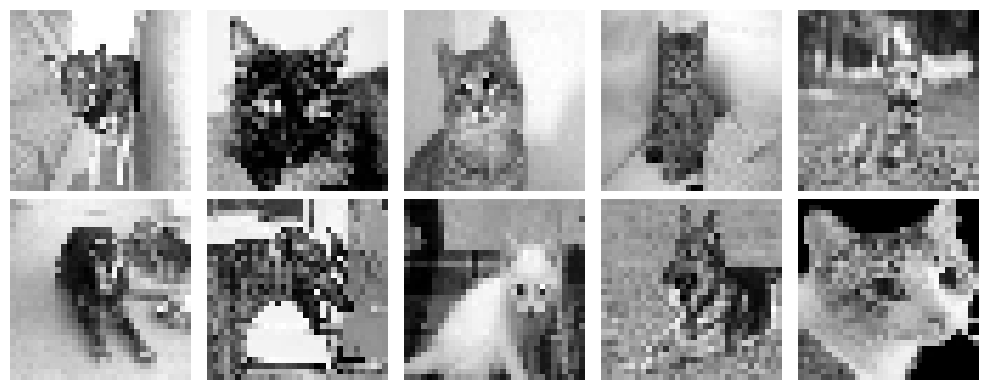

In [78]:
import numpy as np

# Convert x_train to grayscale
x_train_grayscale = np.mean(x_train, axis=3)

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the first 10 grayscale images
for i in range(10):
    # Get the grayscale image
    image = x_train_grayscale[i]

    # Plot the image
    axes[i].imshow(image, cmap='gray')
    axes[i].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [79]:
#sklearn expects i/p to be 2d array-model.fit(x_train,y_train)=>reshape to 2d array
nsamples, nx, ny, nrgb = x_train.shape
x_train2 = x_train.reshape((nsamples,nx*ny*nrgb))

In [80]:
#so,eventually,model.predict() should also be a 2d input
nsamples, nx, ny, nrgb = x_test.shape
x_test2 = x_test.reshape((nsamples,nx*ny*nrgb))

Implementing a Random Forest Classifier

In [81]:
from sklearn.ensemble import RandomForestClassifier
#Create an instance of the RandomForestClassifier class:

model = RandomForestClassifier()
#Finally, let us proceed to train the model:

model.fit(x_train2, y_train)

RandomForestClassifier()

In [82]:
# Save the trained model
model_path = './Model/RF.pkl'
joblib.dump(model, model_path)

['./Model/RF.pkl']

In [83]:
y_pred=model.predict(x_test2)

In [84]:
y_pred

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.

In [85]:
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.72      0.51      0.60       195
           1       0.39      0.65      0.48        96

   micro avg       0.54      0.56      0.55       291
   macro avg       0.55      0.58      0.54       291
weighted avg       0.61      0.56      0.56       291
 samples avg       0.54      0.54      0.54       291



c:\Users\soyvi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
def extract_features(image):
    # Resize the image to 32x32 pixels
    resized_image = image.resize((32, 32))
    
    # Convert the resized image to a numpy array
    image_array = np.array(resized_image)
    
    # Flatten the image array into a 1D feature vector
    feature_vector = image_array.flatten()
    
    return feature_vector

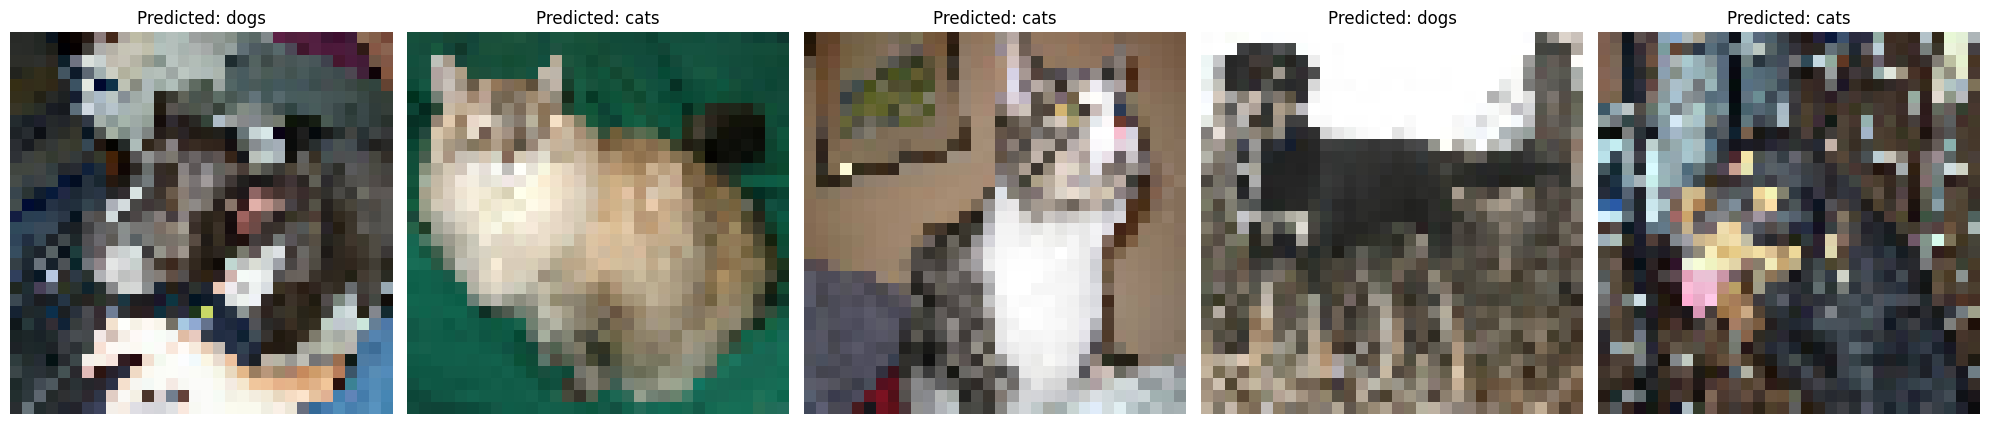

In [101]:
# Define the text labels
text_labels = ['dogs', 'cats']

# Assuming y_pred contains the predicted labels and y_test contains the true labels
# Get the predicted class indices
y_pred_indices = np.argmax(y_pred, axis=1)

# Get the true class indices
y_true_indices = np.argmax(y_test, axis=1)

# Convert numerical labels to text labels
y_pred_text = [text_labels[idx] for idx in y_pred_indices]
y_true_text = [text_labels[idx] for idx in y_true_indices]

# Plot the predictions
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 10))
for i, ax in enumerate(axes):
    # Get the image
    image = x_test[i]
    # Plot the image
    ax.imshow(image)
    # Set the title with the predicted and true labels
    title = f"Predicted: {y_pred_text[i]}"
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()